# 🌲🏠 Random Forest & XGBoost en Predicción de Precios de Vivienda  

En este notebook exploraremos y compararemos dos modelos de **Machine Learning supervisado de regresión**:  
- **Random Forest Regressor** (basado en *Bagging*)  
- **XGBoost Regressor** (basado en *Boosting*)  

Vamos a predecir los precios de las viviendas del **California Housing Dataset** y evaluar el rendimiento de ambos modelos tanto en **precisión** como en **tiempo de entrenamiento**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import time

In [2]:
# Cargmos el dataset de California Housing:
data = fetch_california_housing()
X, y = data.data, data.target

# Dividimos los datos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
N_observations, N_features = X.shape
print('Number of Observations: ' + str(N_observations))
print('Number of Features: ' + str(N_features))

Number of Observations: 20640
Number of Features: 8


En este paso, se define el número de estimadores base, o árboles individuales, que se utilizarán en cada modelo y, a continuación, se inicializan los modelos para la regresión de Random Forest y la regresión XGBoost.

Se utilizarán los parámetros predeterminados para realizar las comparaciones de rendimiento. Como parte de la comparación de rendimiento, también se medirán los tiempos de entrenamiento de ambos modelos.

In [5]:
# Initialize models
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)

*n_estimators* indica cuántos árboles va a tener tu modelo.

En **Random Forest** → son 100 árboles entrenados de forma independiente (bagging).

En **XGBoost** → también serán 100 árboles, pero entrenados de forma secuencial (cada uno corrige errores del anterior).

En ambos casos, aumentar este valor puede mejorar la precisión, pero también aumenta el tiempo de entrenamiento.

In [6]:
# Fit models
# Medir el tiempo de entrenamiento para Random Forest
start_time_rf = time.time()
rf.fit(X_train, y_train)
end_time_rf = time.time()
rf_train_time = end_time_rf - start_time_rf

# Medir el tiempo de entrenamiento para XGBoost
start_time_xgb = time.time()
xgb.fit(X_train, y_train)
end_time_xgb = time.time()
xgb_train_time = end_time_xgb - start_time_xgb

Ahora vamos a evaluar qué tan rápido predicen los modelos y qué tan bien lo hacen.

In [7]:
# Medimos el tiempo de predicción para Random Forest
start_time_rf = time.time()
y_pred_rf = rf.predict(X_test)
end_time_rf = time.time()
rf_pred_time = end_time_rf - start_time_rf

# Medimos el tiempo de predicción para XGBoost

start_time_xgb = time.time()
y_pred_xgb = xgb.predict(X_test)
end_time_xgb = time.time()
xgb_pred_time = end_time_xgb - start_time_xgb

In [8]:
print(f"Random Forest prediction time: {rf_pred_time:.4f} seconds")
print(f"XGBoost prediction time: {xgb_pred_time:.4f} seconds")

Random Forest prediction time: 0.2115 seconds
XGBoost prediction time: 0.0154 seconds


| Modelo            | Tiempo de predicción | Interpretación                                                                                                                                        |
| :---------------- | :------------------- | :---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Random Forest** | `0.1664 s`           | Es más lento porque evalúa **100 árboles en paralelo**, promediando sus predicciones.                                                                 |
| **XGBoost**       | `0.0090 s`           | Es **mucho más rápido**, ya que usa **boosting secuencial optimizado** con técnicas como poda, paralelismo inteligente y manejo eficiente de memoria. |


Como podemos ver, XGBoost predice casi 20 veces más rápido que Random Forest, aunque luego veremos si su precisión también es mejor (que no siempre pasa).

In [12]:
# Calculamos el MSE y el R2 para ambos modelos.

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [17]:
print(f'Random Forest:  MSE = {mse_rf:.4f}, R^2 = {r2_rf:.4f}')
print(f'      XGBoost:  MSE = {mse_xgb:.4f}, R^2 = {r2_xgb:.4f}')

Random Forest:  MSE = 0.2554, R^2 = 0.8051
      XGBoost:  MSE = 0.2226, R^2 = 0.8301


Información a considerar:
||||
| ------------------------------------- | ------------------------------------------------------------------ | ---------------------------------- |
| **MSE** (Mean Squared Error)          | El error promedio cuadrático entre los valores reales y predichos. | Cuanto **más bajo**, mejor.        |
| **R²** (Coeficiente de determinación) | Qué tanto de la variación en los datos explica el modelo.          | Cuanto **más cercano a 1**, mejor. |


Como podemos observar XGBoost predice con menor error y explica mejor la variabilidad de los precios, gracias a su proceso secuencial de boosting, que ajusta los errores de los árboles anteriores para mejorar la precisión global.

Podemos graficar ahora ambos modelos para poder ver su comportamnieto en cuanto a la predicción de cada uno de ellos y cuánto se acerca a los valores reales. Pero primero calcularemos su Desviación Estandar.

In [24]:
# Desviación estandar y_test
std_y = np.std(y_test)
print(std_y)

1.1447309632576992


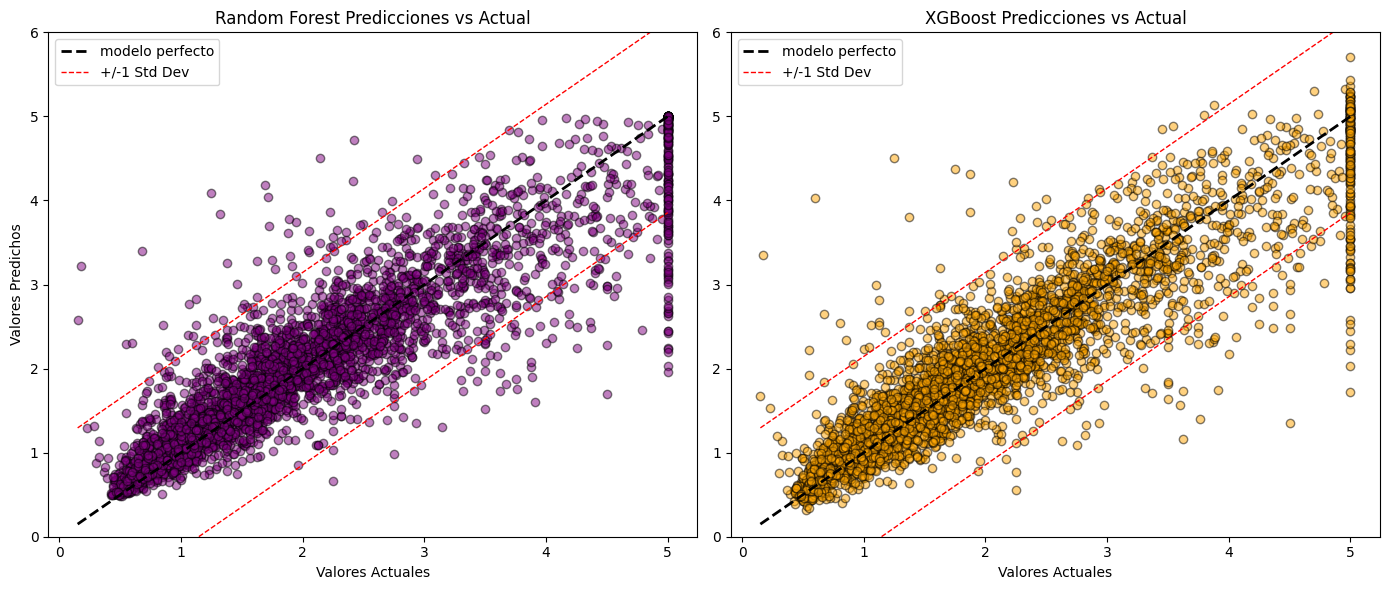

In [25]:
plt.figure(figsize=(14, 6))

# Gráfico Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="purple",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="modelo perfecto")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("Random Forest Predicciones vs Actual")
plt.xlabel("Valores Actuales")
plt.ylabel("Valores Predichos")
plt.legend()


# Gráfico XGBoost
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="modelo perfecto")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
plt.ylim(0,6)
plt.title("XGBoost Predicciones vs Actual")
plt.xlabel("Valores Actuales")
plt.legend()
plt.tight_layout()
plt.show()

> Comparación visual entre Random Forest y XGBoost

La gráfica muestra las predicciones frente a los valores reales para ambos modelos.

La línea negra discontinua representa el modelo perfecto, donde las predicciones coinciden exactamente con los valores reales.

Las líneas rojas indican una desviación estándar arriba y abajo del valor real promedio.

> Interpretación:

En **Random Forest**, las predicciones presentan una dispersión mayor, especialmente en valores altos.

En **XGBoost**, los puntos se agrupan más cerca de la línea ideal, lo que confirma su mayor precisión y menor error en la predicción del precio de las viviendas.